# Logical Expressions and Conditionals

Programs often require that a condition be checked before deciding what to do next. This is done with an `if-else` construct, for example consider the function: 

In [1]:
def cond_example(x,y):
    if x > y:   
        z=1
    else:
        z=0
    return z   

print('z = {0}'.format(cond_example(2,1)))
print('z = {0}'.format(cond_example(1,2)))

z = 1
z = 0


The program above assigns different values to the variable `z` depending on whether `x` is greater than, or less than or equal, to `y`.  The variable `z`
can then be used later to impact the downstream outcome of the code.  Note the colons at the end of the `if` and `else` statements, and the subsequent
indentation.  This formatting is required, and is very similar to what we used for the function `def` statement for defining functions.  Once the indentation ends,
we are outside of the conditional statements and back in the main body of the function code block. 

The expression `x>y` uses the *logical comparison operator* ${\tt >}$. Such operators evaluate to one of two *Boolean* values:  `True` or `False`, which
can then be used in logical statements to govern control flow.  There are six such comparison
operators in Python:

| Operator  |  Description |
|:---------:|:-------------|
| ``>``     | Greater than |
| ``>=``    | Greater than or equal to |
| ``<``     | Less than |
| ``<=``    | Less than or equal to |
| ``==``    | Equal to |
| ``!=``    | Not equal to |


For example, the following statement executes to `False`:


In [12]:
print(1 >=2)

False


Boolean variables can themselves be operated upon with the *logical operators* `and`, `or`, and `not`, where `not` flips the value of a Boolean, and `and` and `or` combine Booleans.  For example 


In [3]:
print(1 >=2 and 4>=3)

False


evaluates to `False`, since both logical expressions are not `True`. Whereas

In [4]:
print(1 >=2 or 4>=3)

True


evaluates to `True`. Finally, 

In [5]:
print(not 1 >=2)

True


The function `cond_example}` above only had two possible outcomes governed by the `if-else` conditional construct. But often there are more than two possibilities.  In this case, we can use the `elif` statement to add additional conditions to the code.   For example, consider an implementation of the 
[Heaviside step function](http://mathworld.wolfram.com/HeavisideStepFunction.html)
$$
\Theta(x) = \begin{cases}
  0 & x < 0 \\
  \frac{1}{2} & x = 0\\
  1 & x > 0
  \end{cases}
$$

In [6]:
def heaviside(x):
    """ Heaviside step function 
    
    Parameters
    ----------
    x : float 
        Input domain value. 
    
    Returns
    -------
    theta : float 
        Heaviside function evauated at x. 
    """
    if x < 0.0:
        return 0.0
    elif x == 0.0:
        return 0.5
    else:
        return 1

In [7]:
print('Heaviside(-1) = {:0.1f}'.format(heaviside(-1.0)))
print('Heaviside(0)  = {:0.1f}'.format(heaviside(0.0)))
print('Heaviside(1)  = {:0.1f}'.format(heaviside(1.0)))

Heaviside(-1) = 0.0
Heaviside(0)  = 0.5
Heaviside(1)  = 1.0



You can have as many `elif` statements as you like, but the `else` statement can only occur once, and if it does occur, it must be the last as its code is only executed if all the previous logical expressions evaluate to `False`.

Note however, that in the code example above, I violated my previous advice about never directly comparing floating point numbers with ```==```. For example, an alternative implementation of the Heaviside step function might be:

In [8]:
import numpy as np
def heaviside_isclose(x):
    """ Heaviside step function 
    
    Parameters
    ----------
    x : float 
        Input domain value. 
    
    Returns
    -------
    theta : float 
        Heaviside function evauated at x. 
    """
    if x < 0.0:
        return 0.0
    elif np.isclose(x, 0.0):
        return 0.5
    else:
        return 1

In [9]:
print('Heaviside(1e-16)  = {:0.1f}'.format(heaviside(1e-16)))
print('Heaviside_isclose(1e-16)  = {:0.1f}'.format(heaviside_isclose(1e-16)))

Heaviside(1e-16)  = 1.0
Heaviside_isclose(1e-16)  = 0.5


Which version you choose depends on the context of the problem you are trying to solve.  In the first version, we only deal with exact equality to zero, and in the second version we deal with a tolerance around zero, set by the default tolerances in the ```np.isclose``` function.  The second version is more robust to floating point errors causing numbers to be consistent with zero, but not exactly being represented as zero. 

Finally, as a last example you may know that the gravitational potential energy of a test mass $m$ at a distance $r$ from the center of a uniform density sphere of total mass $M$ and radius $R$ is given by
$$
U_{\rm grav}(r)=\begin{cases}
-\frac{GMm(3R^2-r^2)}{2R^3} & r\le R\\
-\frac{GMm}{r} & r\gt R
\end{cases}
$$

In [10]:
def U_grav(r,M,R,m): 
    """ Gravitational potential energy of a mass m at a distance r from a uniform density sphere of total mass M and radius R. 
    
    Parameters
    ----------
    r : float 
        Distance from center of the sphere (m).  
    M : float 
        Total mass of the sphere (kg).
    R : float 
        Radius of the sphere (m)
    m : float 
        Mass of test mass (kg).
    
    Returns
    -------
    U : float 
        Gravitational potential energy (J). 
    """
    G=6.67408e-11 # Newton's gravitational constant in units of m^3/(kg s^2)
    if r <= R:
        return -G*M*m*(3*R**2-r**2)/2/R**3
    else:
        return -G*M*m/r

For fun, we will make a simple plot of this function using some python  techniques we will be exploring in the next few weeks:  

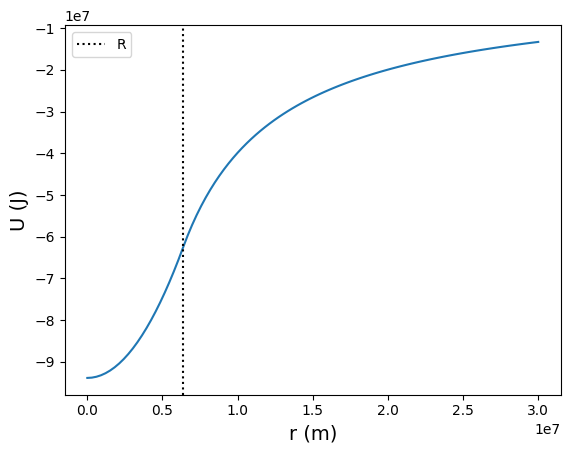

In [11]:
import matplotlib.pyplot as plt
import numpy as np
R = 6.371e6 # Radius of the Earth in m
M = 5.972e24 # Mass of the Earth in kg 
m = 1.0 # Mass of the test mass in kg
# Create an arry of 100 evenly spaced values of r from 0 to 3e7
nr=100
r = np.linspace(0.0,3.0e7,nr)
# Initialize an array of zeros for U which we will fill up
U = np.zeros_like(r) 
# Populate U
for i in range(nr):
    U[i] = U_grav(r[i],M,R,m)
# Make the plot of U(r) vs r
plt.plot(r,U)
plt.axvline(R,color='k',linestyle=':', label='R')
plt.xlabel('r (m)', fontsize=14)
plt.ylabel('U (J)', fontsize=14)
plt.legend()
plt.show()


Note that the gravitational potential energy is continous across the surface of the Earth at $r=R=6.371\times 10^6~{\rm m}$, which is indicated by the vertical dotted line.  